### 21BRS1643 OMKAR ADITYA SAHOO

### Importing headers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

### Reading csv files

In [2]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Linearity Check

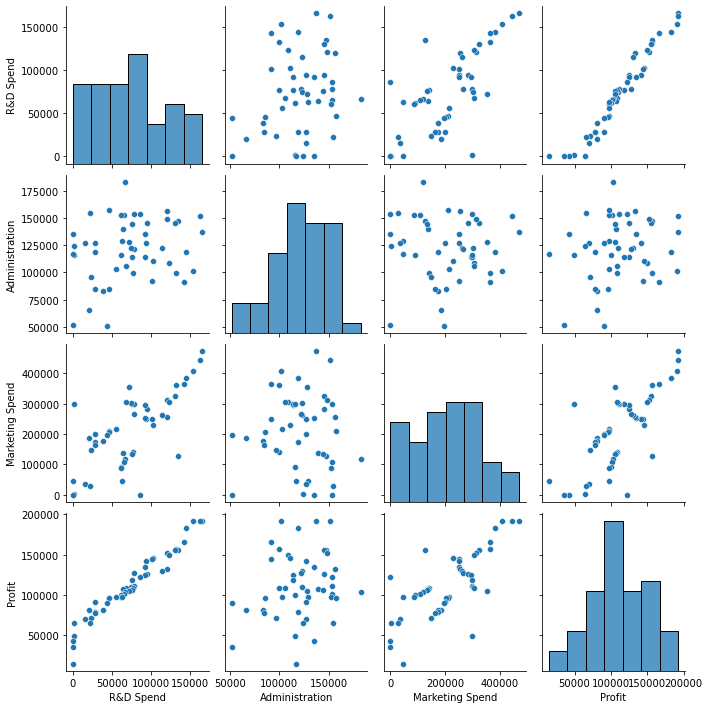

In [5]:
p = sns.pairplot(df)

#### Visible R&D Spend and Marketing Spend having linearity with Profit

/home/lab1/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


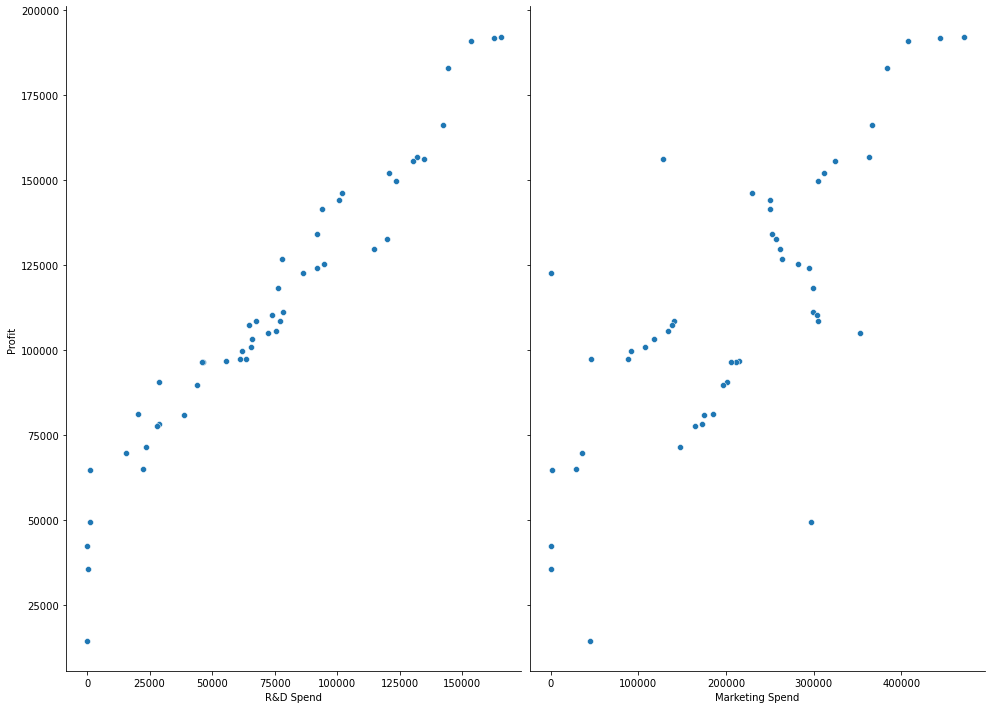

In [9]:
p = sns.pairplot(df, x_vars=['R&D Spend','Marketing Spend'], y_vars='Profit', size=10, aspect=0.7)

### Checking for missing values

In [26]:
# Get the count of Zeros in column 'C' 
count = (df == 0).sum()
count

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

### Treating all missing values

In [27]:
df = df[(df != 0).all(axis=1)]
# Get the count of Zeros in column 'C' 
count = (df == 0).sum()
count

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Checking for categorical values

In [3]:
# Find columns which contain strings

# can treat pd columns as dict

for label,content in df.items(): # label is column name, content are the item within it
    if pd.api.types.is_object_dtype(content):
        print(label)

State


In [6]:
# Turn categorical variables into numbers and fill missing
for label,content in df.items(): # label is column name, content are the item within it
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column to indicate whether sample has missing values
        df[label+"_is missing"]=pd.isnull(content)
            
        # turn catgories into numbers and add +1
        df[label]=pd.Categorical(content).codes+1

### Splitting data into train and test split

In [7]:
X = df.drop(["Profit"],axis=1)
y = df.Profit


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 23,test_size=0.25)

### Fitting in a model

In [15]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_train)


### Predicted profit prices

In [27]:
y_pred

array([174602.08807394, 114206.35428053,  48346.14204472,  99540.8299959 ,
        89980.26378306, 113814.23501095, 109230.23739751, 172451.13854437,
        69171.60631079, 160706.62980523, 189612.69048594,  46897.83154947,
        73682.27294584,  47398.22379547, 147095.6180211 ,  54227.50488825,
       116239.68028133,  88257.94391049,  88009.19318227, 193610.58228876,
       164179.21830251, 117568.47451369, 135162.22339239, 182582.78177959,
        60082.10623836, 159303.06567244, 101968.06372391, 110994.90712691,
        82353.32995909, 114109.55890879, 129279.69461542,  98469.31066684,
        45505.86644688, 154817.25520942,  73540.20418581,  68599.29710519,
       117278.21555685])

### Mean residuals

In [37]:

# Calculating mean residuals
residuals = y_train - y_pred
np.mean(residuals)

2.8710535450561627e-11

### Check for Homoscedasticity

Text(0, 0.5, 'Residuals')

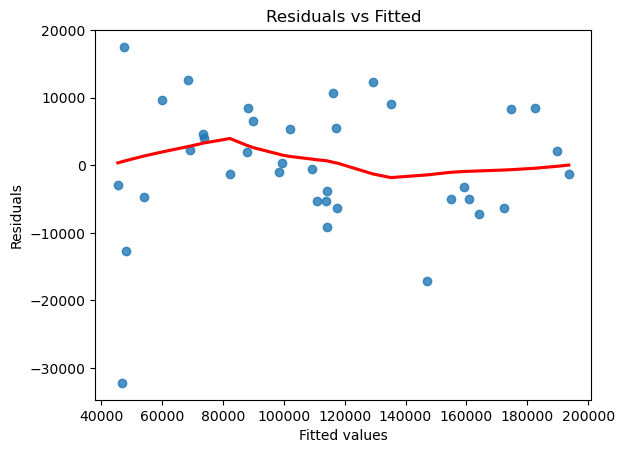

In [43]:
# b. Check for Homoscedasticity
# Plotting residuals
import matplotlib.pyplot as plt
predicted_values = reg.predict(X_train)

sns.regplot(x=predicted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

### Normality of error terms

C:\Users\hp\AppData\Local\Temp\ipykernel_16856\3477223015.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


Text(0.5, 0, 'Residuals')

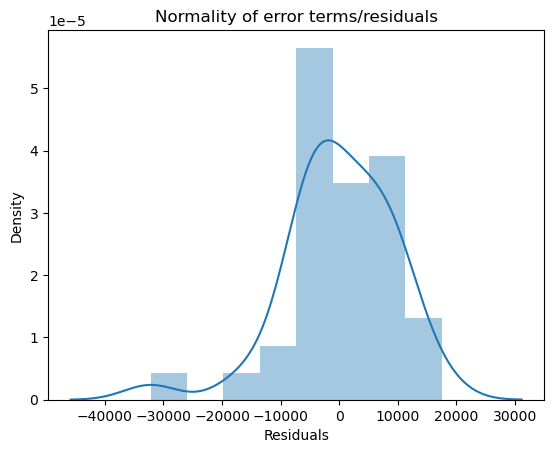

In [44]:
# c. Check for Normality of error terms/residuals
sns.distplot(residuals)
plt.title('Normality of error terms/residuals')
plt.xlabel('Residuals')

### No autocorrelation of residuals

Text(0.5, 1.0, 'Autocorrelation plot')

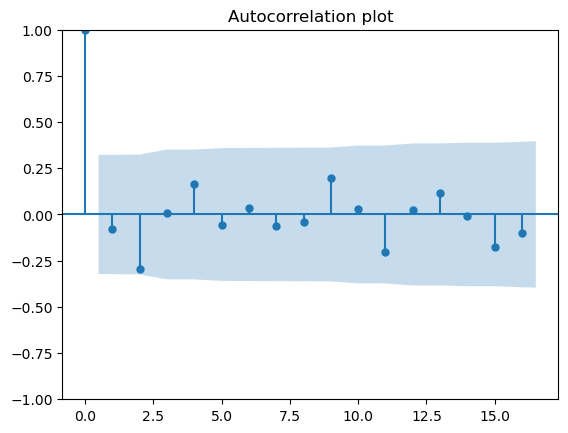

In [45]:
# d. No autocorrelation of residuals
sm.graphics.tsa.plot_acf(residuals)
plt.title('Autocorrelation plot')

### r2_score

In [18]:
r2_score(y_train, y_pred)

0.9563787074850465

### MAE

In [19]:
mean_absolute_error(y_train, y_pred)

7043.594629052333

### MSE

In [21]:
mean_squared_error(y_train, y_pred)

85143614.6300325

### RMSE

In [23]:
np.sqrt(mean_squared_error(y_train, y_pred))

9227.329767057883